# Task 2: Perform Data Analysis of Air Pollution due to PM2.5 with respect to diffirent climatic conditions.

No: Number of row

year: Year's data

month: month's data

day: day's data

hour: hour's data

pm2.5: PM2.5 concentration 

DEWP: Dew Point 

TEMP: Temperature

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

#### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = r"C:\Users\vedan\OneDrive\Desktop\PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(path)

#### Finding number of rows in dataSet

In [6]:
df.shape

(43824, 13)

In [7]:
len(df)

43824

In [8]:
df.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [9]:
df.drop('No',axis=1,inplace=True)

In [10]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [11]:
#adding date column
date_column =df[['year','month','day']].apply(lambda x:'-'.join(x.values.astype(str)),axis='columns')
df.insert(5,'date',date_column)
df['date']=pd.to_datetime(df['date'])

In [12]:
df.head()

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,2010-01-01,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,2010-01-01,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,2010-01-01,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,2010-01-01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,2010-01-01,-20,-12.0,1018.0,NW,12.97,0,0


In [13]:
"Total Null Values:",df.isnull().sum().sum()
null = df.isnull().sum()
null
# 2067 null entries in 'pm2.5' coulmn

year        0
month       0
day         0
hour        0
pm2.5    2067
date        0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [14]:
df1 = df.fillna(value = df['pm2.5'].mean())
df1.head(10)

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,2010-01-01,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,98.613215,2010-01-01,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,98.613215,2010-01-01,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,98.613215,2010-01-01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,98.613215,2010-01-01,-20,-12.0,1018.0,NW,12.97,0,0
5,2010,1,1,5,98.613215,2010-01-01,-19,-10.0,1017.0,NW,16.10,0,0
6,2010,1,1,6,98.613215,2010-01-01,-19,-9.0,1017.0,NW,19.23,0,0
7,2010,1,1,7,98.613215,2010-01-01,-19,-9.0,1017.0,NW,21.02,0,0
8,2010,1,1,8,98.613215,2010-01-01,-19,-9.0,1017.0,NW,24.15,0,0
9,2010,1,1,9,98.613215,2010-01-01,-20,-8.0,1017.0,NW,27.28,0,0


# Exploratory Data Analysis

In [15]:
df.head()

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,2010-01-01,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,2010-01-01,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,2010-01-01,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,2010-01-01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,2010-01-01,-20,-12.0,1018.0,NW,12.97,0,0


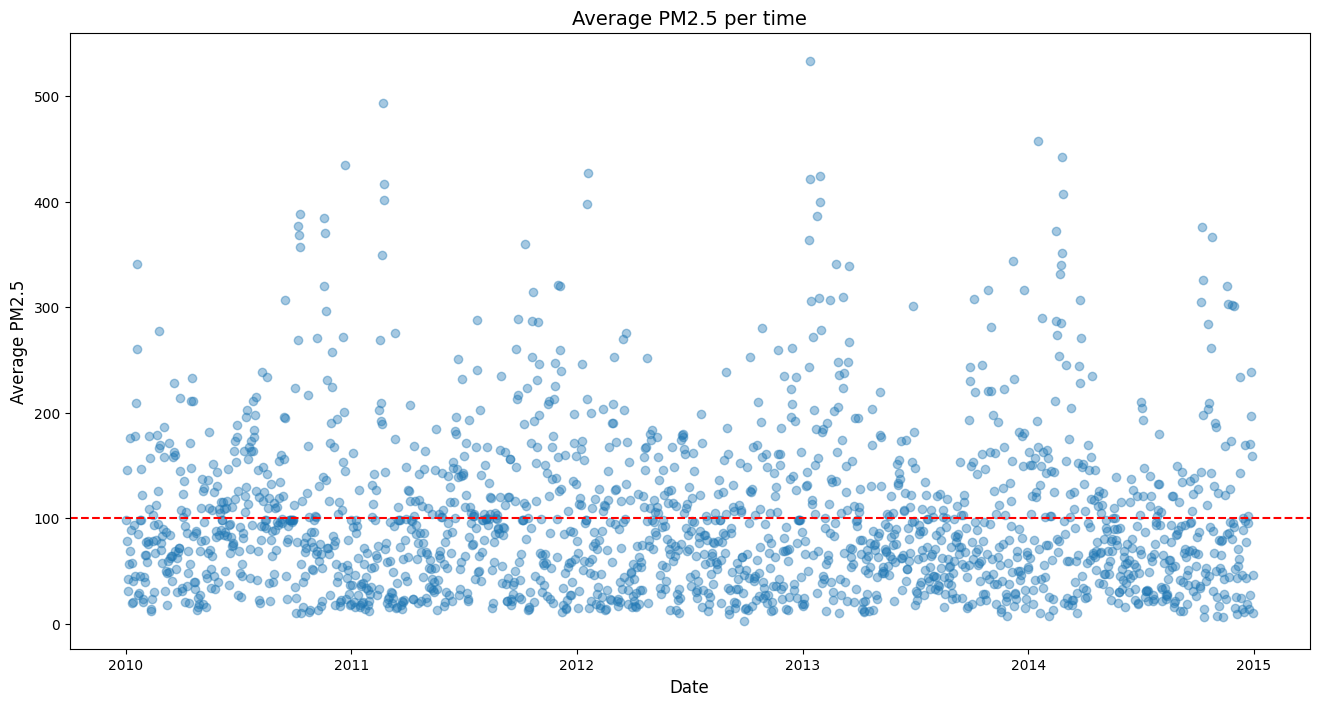

In [16]:
date = df1.groupby('date')['pm2.5'].mean()

plt.figure(figsize= [16, 8])
plt.scatter(x = date.index, y = date, marker='o',alpha=0.4)
plt.axhline(100, ls= '--', color= 'red')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)

plt.show()

In [17]:
df1['cbwd'].describe()
# sum(df1['cbwd']=='SE')

count     43824
unique        4
top          SE
freq      15290
Name: cbwd, dtype: object

In [18]:
cbwd_valueCounts = df1['cbwd'].value_counts()
print(cbwd_valueCounts)

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64


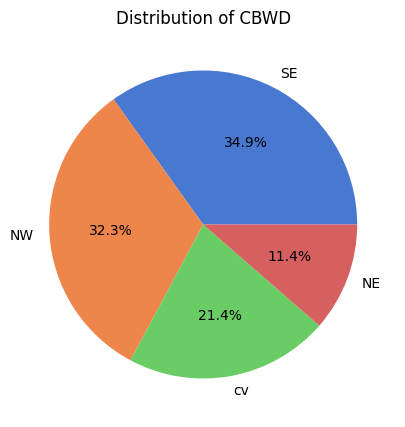

Report Shows the Maximum Combined Wind Direction (2010-2014) was of South-East SE Direction 34.9%


In [19]:
cbwd_valueCounts = df1['cbwd'].value_counts()
plt.figure(figsize=(5,5))
labels = ['SE','NW','cv','NE']
palette = sns.color_palette("muted")
# palette = deep, muted, bright, pastel, dark, colorblind
plt.pie(x=cbwd_valueCounts,colors=palette,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of CBWD")
plt.show()
print("""Report Shows the Maximum Combined Wind Direction (2010-2014) was of South-East SE Direction 34.9%""")

In [20]:
# check the data of how many years
df1['year'].value_counts()

year
2012    8784
2010    8760
2011    8760
2013    8760
2014    8760
Name: count, dtype: int64

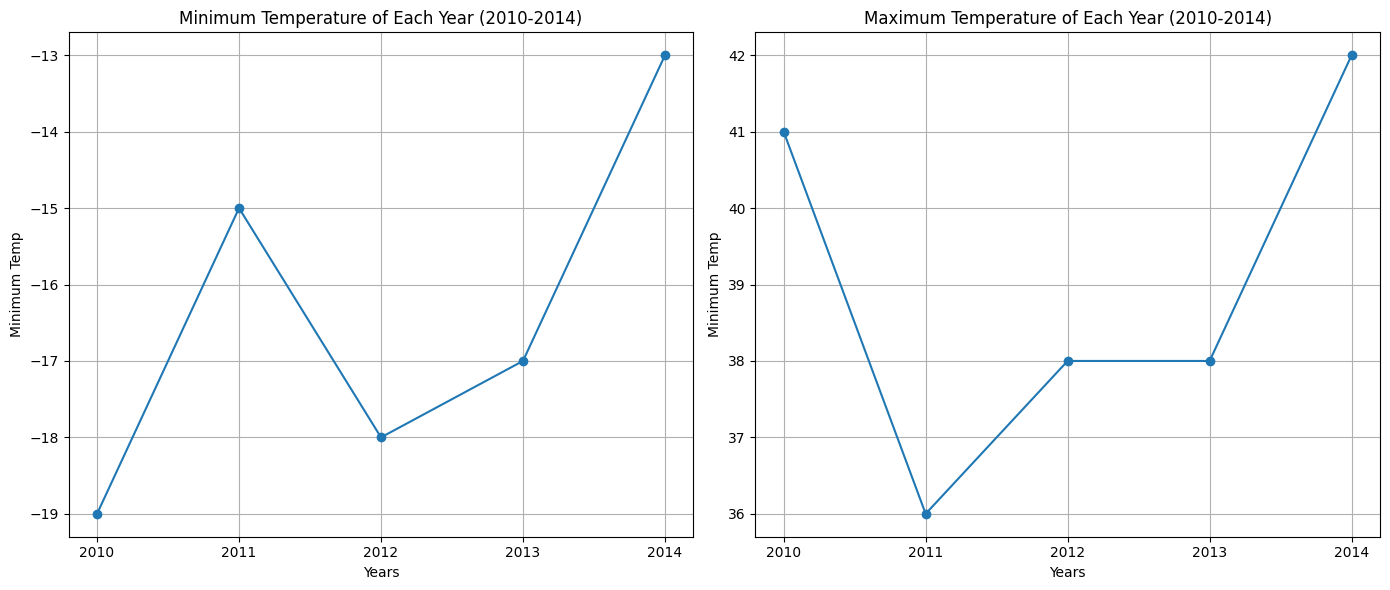

In [21]:
# Finding minimum temp of each year
year = np.arange(2010,2015)
min_temps = df1.groupby('year')['TEMP'].min().reset_index()
max_temps = df1.groupby('year')['TEMP'].max().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(year,min_temps['TEMP'],marker='o')
axs[0].set_title('Minimum Temperature of Each Year (2010-2014)')
axs[0].set_xlabel("Years")
axs[0].set_ylabel("Minimum Temp")
axs[0].set_xticks(year)
axs[0].grid(True)
axs[1].plot(year,max_temps['TEMP'],marker='o')
axs[1].set_title('Maximum Temperature of Each Year (2010-2014)')
axs[1].set_xlabel("Years")
axs[1].set_ylabel("Minimum Temp")
axs[1].set_xticks(year)
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [22]:
df1.sample(5)

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
30658,2013,7,1,10,143.0,2013-07-01,22,25.0,1000.0,SE,4.92,0,0
35027,2013,12,30,11,34.0,2013-12-30,-23,6.0,1017.0,NW,75.98,0,0
16091,2011,11,2,11,26.0,2011-11-02,-3,15.0,1029.0,NW,4.02,0,0
7974,2010,11,29,6,154.0,2010-11-29,-8,-4.0,1020.0,NW,4.47,0,0
23734,2012,9,15,22,45.0,2012-09-15,12,15.0,1021.0,NE,1.79,0,0


In [23]:
# Pressure Data of JAN each Day(mean) of 2012
new_df = df1[(df1['year'] == 2012) & (df1['month'] == 1)]
new_df.head()

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
17520,2012,1,1,0,275.0,2012-01-01,-12,-8.0,1030.0,NE,0.89,0,0
17521,2012,1,1,1,303.0,2012-01-01,-13,-10.0,1031.0,NW,1.79,0,0
17522,2012,1,1,2,215.0,2012-01-01,-13,-9.0,1032.0,NW,3.58,0,0
17523,2012,1,1,3,222.0,2012-01-01,-13,-9.0,1033.0,NW,6.71,0,0
17524,2012,1,1,4,85.0,2012-01-01,-13,-4.0,1033.0,NE,4.92,0,0


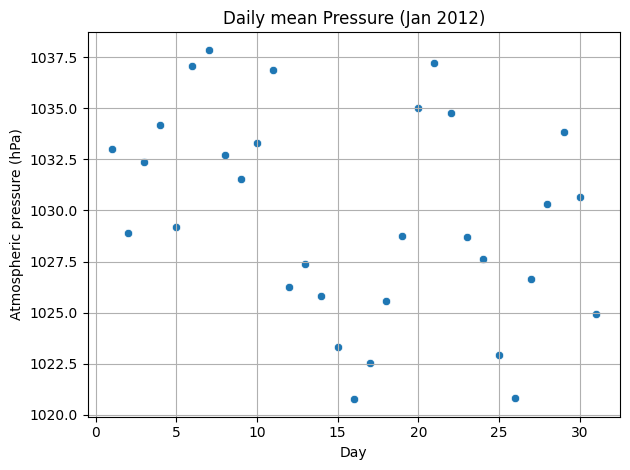

In [24]:
dailyAvgPRES = new_df.groupby('day')['PRES'].mean().reset_index()
dailyAvgPRES.rename(columns={'PRES':'mean_PRES'}, inplace=True)
plt.title("Daily mean Pressure (Jan 2012)")
plt.xlabel('Day')
plt.ylabel("Atmospheric pressure (hPa)")
sns.scatterplot(data = dailyAvgPRES, x= dailyAvgPRES['day'],y = dailyAvgPRES['mean_PRES'])
plt.grid(which='both')
plt.tight_layout(pad=1.08)

plt.show()

#### mean atmospheric pressure above 1020 hPa over month is considered to be High-pressure systems that bring stable, dry, and clean atmosphere, these shows a sequencial pattern !!

---

## Monthly Mean Pressure of Each Month Of Years

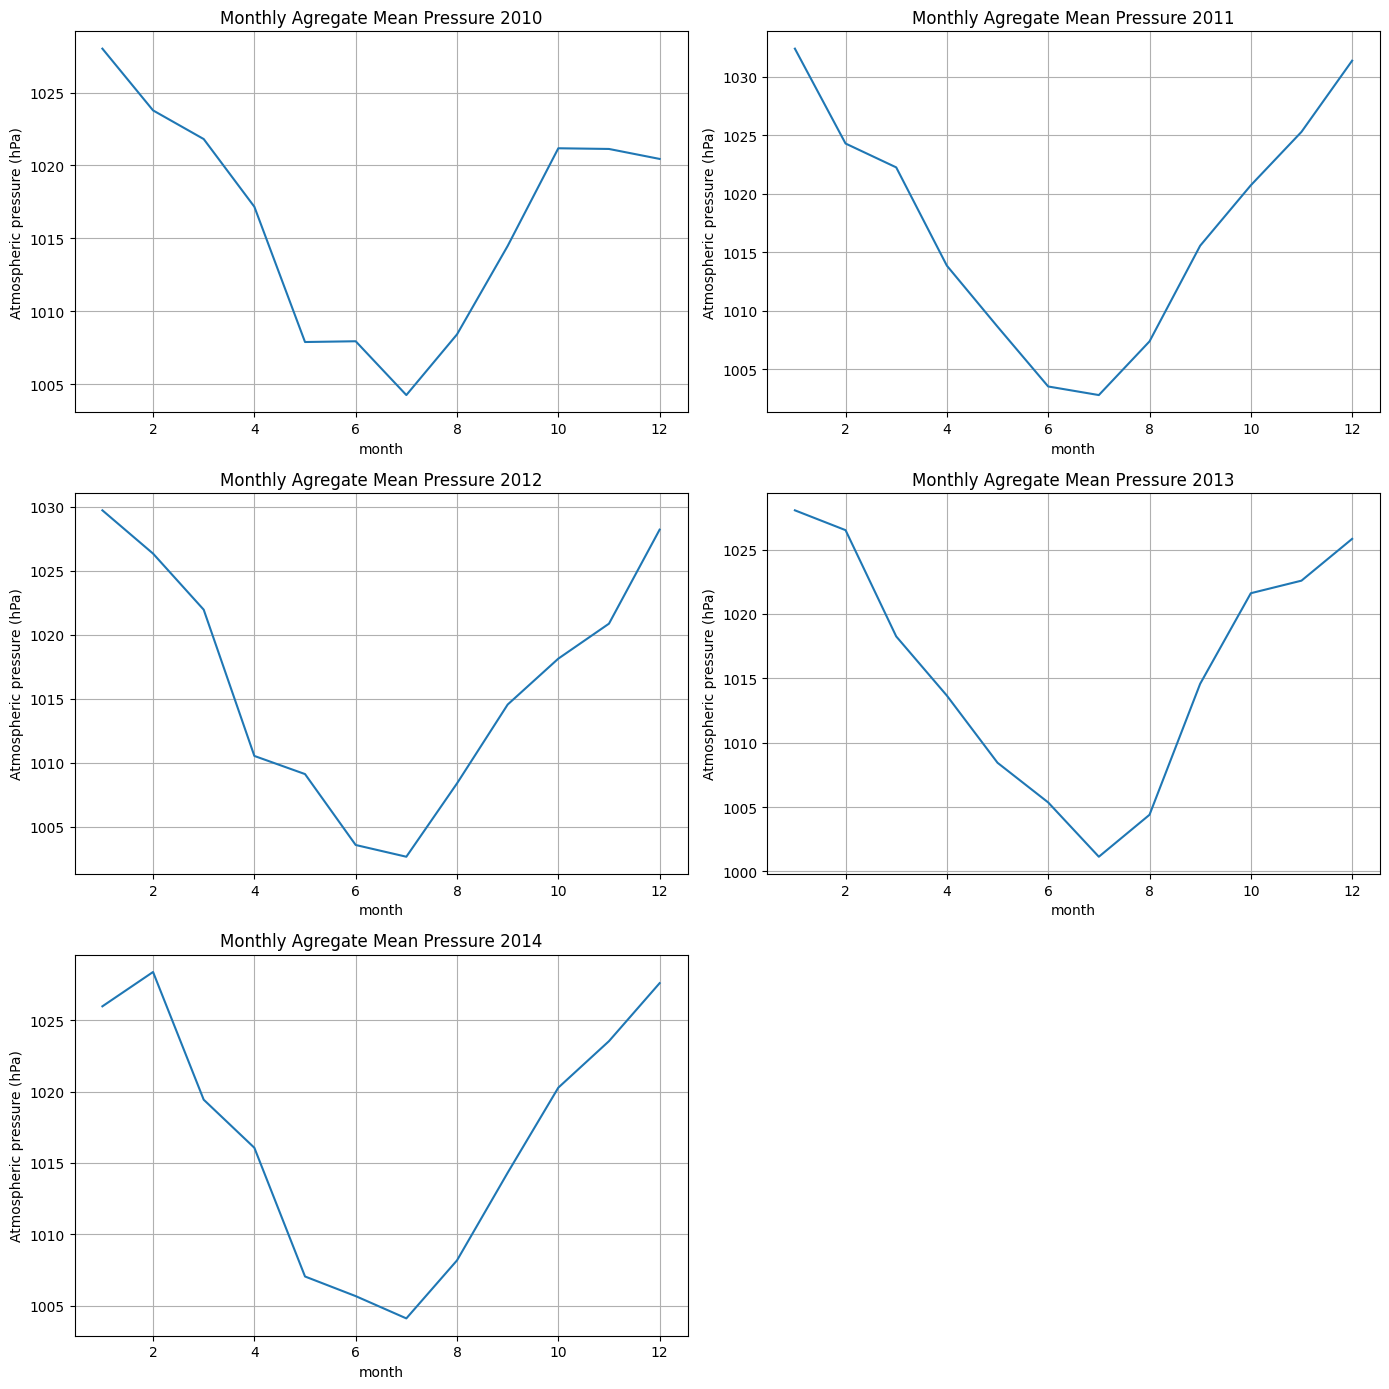

In [25]:
df_monthly_2010 = df1[df1['year']==2010].groupby('month')['PRES'].mean().reset_index()
df_monthly_2011 = df1[df1['year']==2011].groupby('month')['PRES'].mean().reset_index()
df_monthly_2012 = df1[df1['year']==2012].groupby('month')['PRES'].mean().reset_index()
df_monthly_2013 = df1[df1['year']==2013].groupby('month')['PRES'].mean().reset_index()
df_monthly_2014 = df1[df1['year']==2014].groupby('month')['PRES'].mean().reset_index()


plt.figure(figsize=(14,14))

plt.subplot(3,2,1)
plt.plot(df_monthly_2010['month'],df_monthly_2010['PRES'])
plt.title("Monthly Agregate Mean Pressure 2010")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.subplot(3,2,2)
plt.plot(df_monthly_2011['month'],df_monthly_2011['PRES'])
plt.title("Monthly Agregate Mean Pressure 2011")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.subplot(3,2,3)
plt.plot(df_monthly_2012['month'],df_monthly_2012['PRES'])
plt.title("Monthly Agregate Mean Pressure 2012")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.subplot(3,2,4)
plt.plot(df_monthly_2013['month'],df_monthly_2013['PRES'])
plt.title("Monthly Agregate Mean Pressure 2013")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.subplot(3,2,5)
plt.plot(df_monthly_2014['month'],df_monthly_2014['PRES'])
plt.title("Monthly Agregate Mean Pressure 2014")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.tight_layout()
plt.show()


>All year report shows that 7th month has lowest pressure each yr  (more possibility to rain, distorted weather)

#### Visualizing All Year Agregate Mean Pressure In single Garph

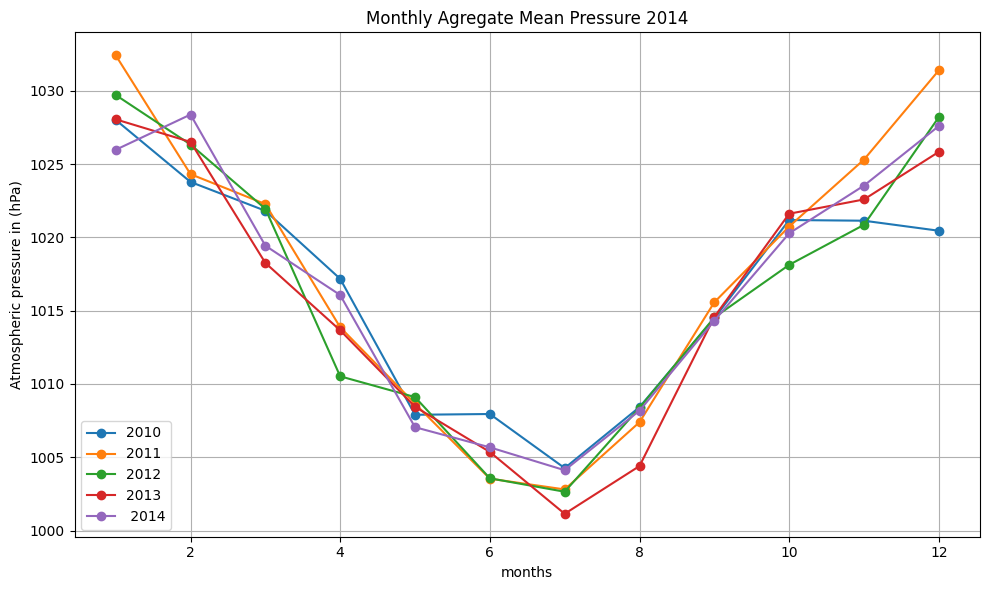

In [26]:
df_monthly_2010 = df1[df1['year']==2010].groupby('month')['PRES'].mean().reset_index()
df_monthly_2011 = df1[df1['year']==2011].groupby('month')['PRES'].mean().reset_index()
df_monthly_2012 = df1[df1['year']==2012].groupby('month')['PRES'].mean().reset_index()
df_monthly_2013 = df1[df1['year']==2013].groupby('month')['PRES'].mean().reset_index()
df_monthly_2014 = df1[df1['year']==2014].groupby('month')['PRES'].mean().reset_index()


plt.figure(figsize=(10,6))

plt.plot(df_monthly_2010['month'],df_monthly_2010['PRES'], marker='o',label='2010')
plt.title("Monthly Agregate Mean Pressure 2010")
plt.grid()


plt.plot(df_monthly_2011['month'],df_monthly_2011['PRES'], marker='o',label='2011')
plt.title("Monthly Agregate Mean Pressure 2011")
plt.grid()


plt.plot(df_monthly_2012['month'],df_monthly_2012['PRES'], marker='o',label='2012')
plt.title("Monthly Agregate Mean Pressure 2012")
plt.grid()

plt.plot(df_monthly_2013['month'],df_monthly_2013['PRES'], marker='o',label="2013")
plt.title("Monthly Agregate Mean Pressure 2013")
plt.grid()

plt.plot(df_monthly_2014['month'],df_monthly_2014['PRES'], marker='o',label=' 2014')
plt.title("Monthly Agregate Mean Pressure 2014")
plt.xlabel('months')
plt.ylabel("Atmospheric pressure in (hPa)")
plt.grid()

plt.legend()
plt.tight_layout()
plt.show()

## Heatmap

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    43824 non-null  int64         
 1   month   43824 non-null  int64         
 2   day     43824 non-null  int64         
 3   hour    43824 non-null  int64         
 4   pm2.5   43824 non-null  float64       
 5   date    43824 non-null  datetime64[ns]
 6   DEWP    43824 non-null  int64         
 7   TEMP    43824 non-null  float64       
 8   PRES    43824 non-null  float64       
 9   cbwd    43824 non-null  object        
 10  Iws     43824 non-null  float64       
 11  Is      43824 non-null  int64         
 12  Ir      43824 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 4.3+ MB


In [28]:
# as 'cbwd' column is object type we need to remove it to deal further (ONLY numeric ALLOWED)
df1

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,2010-01-01,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,98.613215,2010-01-01,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,98.613215,2010-01-01,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,98.613215,2010-01-01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,98.613215,2010-01-01,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.000000,2014-12-31,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.000000,2014-12-31,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.000000,2014-12-31,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.000000,2014-12-31,-22,-4.0,1034.0,NW,246.72,0,0


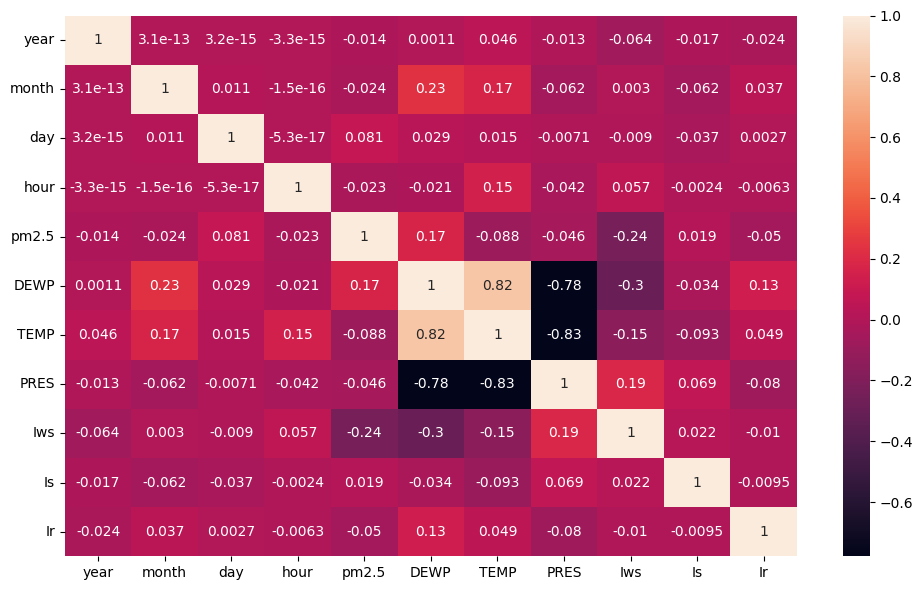

In [29]:
df2 = df1.drop(['date','cbwd'], axis=1)
df_pairplot = df1.drop(['year','month','day','hour','date','DEWP','Is','Ir'],axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True,robust=True)
plt.tight_layout()
plt.show()

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


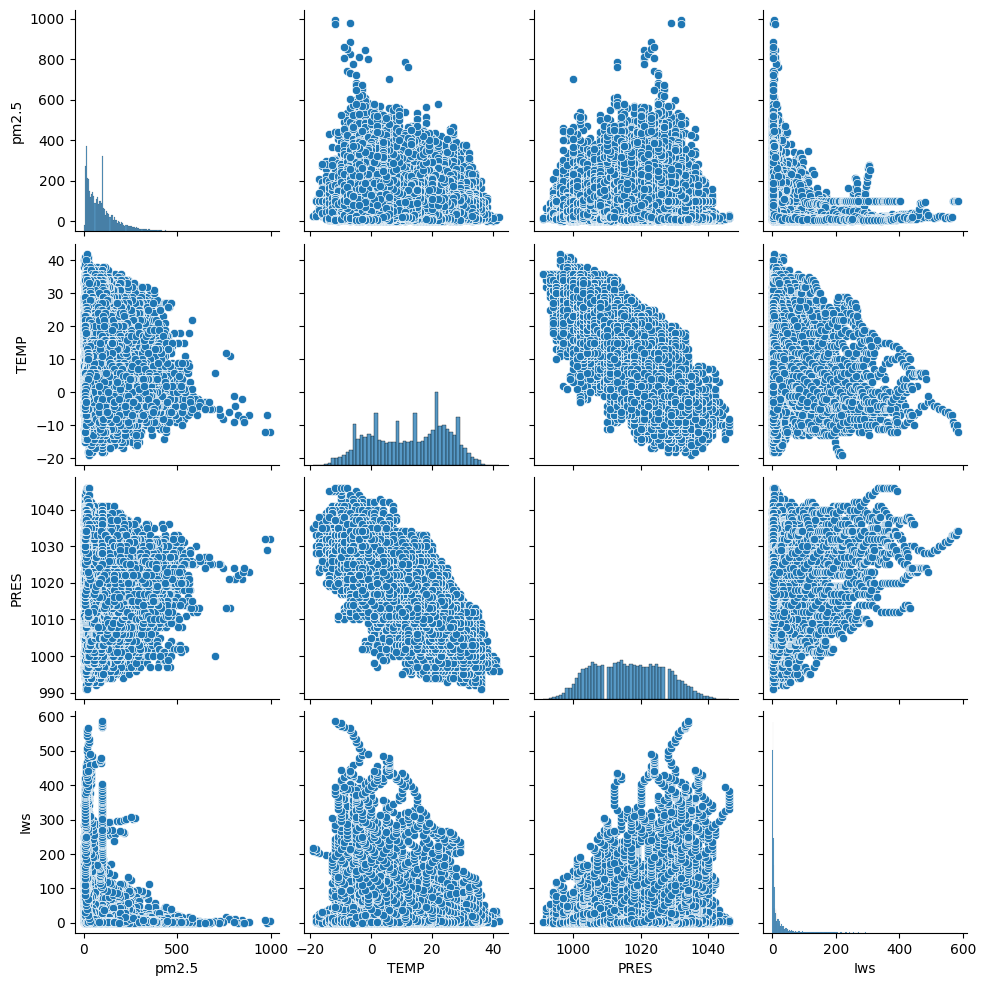

In [30]:
sns.pairplot(data=df_pairplot)
plt.show()

---

# Training And Testing Data

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    43824 non-null  int64         
 1   month   43824 non-null  int64         
 2   day     43824 non-null  int64         
 3   hour    43824 non-null  int64         
 4   pm2.5   43824 non-null  float64       
 5   date    43824 non-null  datetime64[ns]
 6   DEWP    43824 non-null  int64         
 7   TEMP    43824 non-null  float64       
 8   PRES    43824 non-null  float64       
 9   cbwd    43824 non-null  object        
 10  Iws     43824 non-null  float64       
 11  Is      43824 non-null  int64         
 12  Ir      43824 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 4.3+ MB


In [32]:
X = df1.drop(['date','pm2.5','cbwd'],axis=1)
y = df1['pm2.5']

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [35]:
# Normalization of quantitaitve features
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_train=Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

## Ridge Regression

In [101]:
ridge = Ridge()
params = {'alpha':[1,2,3,4,5,10,20,30,50]}
grid = GridSearchCV(ridge,params,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("Best lambda : ",grid.best_params_)
print("Best score: ", grid.best_score_)

Best lambda :  {'alpha': 2}
Best score:  -6098.946717510179


In [102]:
bestridged = Ridge(alpha=58)
bestridged.fit(X_train,y_train)
y_pred1 = bestridged.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ridge_mae= mean_absolute_error(y_test, y_pred1)
ridge_mse=mean_squared_error(y_test, y_pred1)
ridge_rmse= np.sqrt(ridge_mse)
ridge_r2 =r2_score(y_test, y_pred1)

print("min Absolute Error:",ridge_mae)
print("mean Squared Error:",ridge_mse)
print("root mean squared error:",ridge_rmse)
print("r2:",ridge_r2)

min Absolute Error: 56.65169369293554
mean Squared Error: 6063.380809647354
root mean squared error: 77.86771352523043
r2: 0.24309319627121362


C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


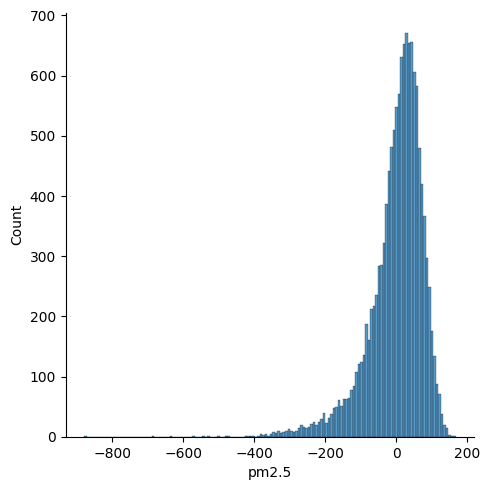

In [104]:
sns.displot(y_pred1-y_test)
# plt.show()

C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


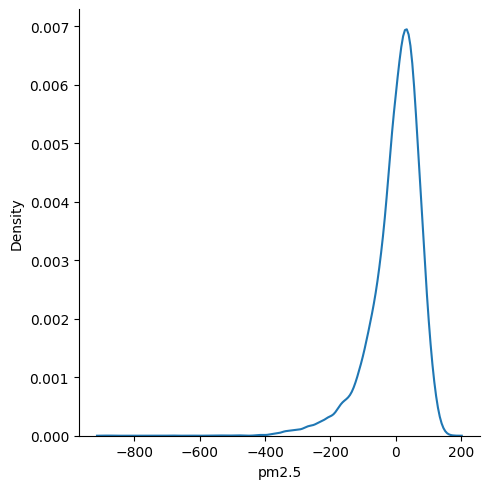

In [105]:
sns.displot(y_pred1-y_test,kind='kde')

---

## Random Forest Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# applying Random Forest Regression
forest = RandomForestRegressor()
forest.fit(X_train,y_train)
rf_pred = forest.predict(X_test)

In [42]:
## testing the trained model efficiency
mae= mean_absolute_error(y_test, rf_pred)
mse=mean_squared_error(y_test, rf_pred)
rmse= np.sqrt(mse)
r2 =r2_score(y_test, rf_pred)

print("min Absolute Error:",mae)
print("mean Squared Error:",mse)
print("root mean squared error:",rmse)
print("r2:",r2)

min Absolute Error: 23.339416273168084
mean Squared Error: 1384.9648605062532
root mean squared error: 37.21511602166858
r2: 0.8271114154376458


In [43]:
# Putting some random param
param = {'n_estimators': [50,70,90,100, 200, 300], 'max_depth': [None, 5, 10, 30],'min_samples_split': [3, 7, 12],'min_samples_leaf': [1, 3, 4]}

In [44]:
gridSearch = GridSearchCV(estimator=forest, param_grid=param, cv=5, n_jobs= -1, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 30],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [3, 7, 12],
                         'n_estimators': [50, 70, 90, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [54]:
# getting the best model 
reqParams = gridSearch.best_params_
reqModel = gridSearch.best_estimator_

print(reqParams)
print(reqModel)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
RandomForestRegressor(min_samples_split=3, n_estimators=300)


In [56]:
# this model is the best param estimator
reqModel.fit(X_train,y_train)
rf_pred = reqModel.predict(X_test)

> here is my best model results..


In [72]:
## testing the trained model efficiency (for best parameter!)
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_mae= mean_absolute_error(y_test, rf_pred)
rf_mse=mean_squared_error(y_test, rf_pred)
rf_rmse= np.sqrt(rf_mse)
rf_r2 =r2_score(y_test, rf_pred)

print("min Absolute Error:",rf_mae)
print("mean Squared Error root:",rf_mse)
print("root mean squared error:",rf_rmse)
print("r2:",rf_r2)

min Absolute Error: 23.25824512304097
mean Squared Error root: 1371.2498331114673
root mean squared error: 37.030390669171545
r2: 0.8288234961850603


In [106]:
import math
print('Root Mean Squared Error of Ridge Regressor is ',math.sqrt(ridge_mse))
print('Root Mean Squared Error of random Forest Regressor is ',math.sqrt(rf_mse))

Root Mean Squared Error of Ridge Regressor is  77.86771352523043
Root Mean Squared Error of random Forest Regressor is  37.030390669171545


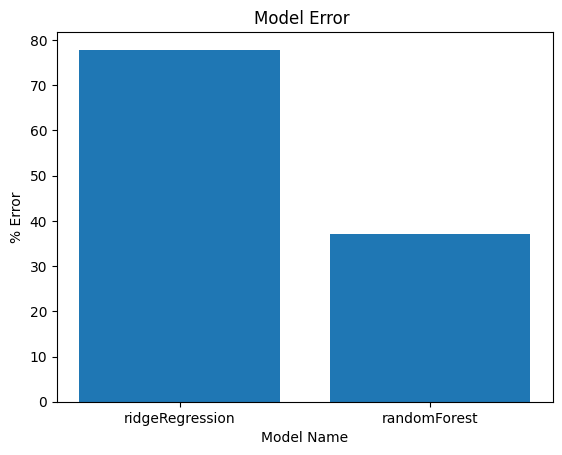

In [90]:
x_axis = ['ridgeRegression','randomForest']
y_axis = [77.86771352523043,37.030390669171545]
plt.bar(x_axis,y_axis)
plt.xlabel("Model Name")
plt.ylabel("% Error")
plt.title("Model Error ")
plt.show()

---

## K-Cluster

In [107]:
from sklearn.cluster import KMeans
df1.sample(4)

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2660,2010,4,21,20,34.0,2010-04-21,3,12.0,1022.0,NE,4.92,0,2
36503,2014,3,1,23,112.0,2014-03-01,-16,4.0,1022.0,SE,24.13,0,0
41828,2014,10,9,20,443.0,2014-10-09,15,15.0,1020.0,NW,0.89,0,0
40691,2014,8,23,11,134.0,2014-08-23,21,29.0,1006.0,cv,5.35,0,0


In [108]:
x = df1[['pm2.5','TEMP']]
list = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i, init='k-means++',random_state=30)
    kmean.fit(x)
    list.append(kmean.inertia_)
list

[360331152.1146177,
 131898678.51615214,
 70542874.03334327,
 43055336.77568012,
 30836924.850275785,
 24921278.42121583,
 20110992.94746165,
 16975351.841695722,
 14844228.03113683]

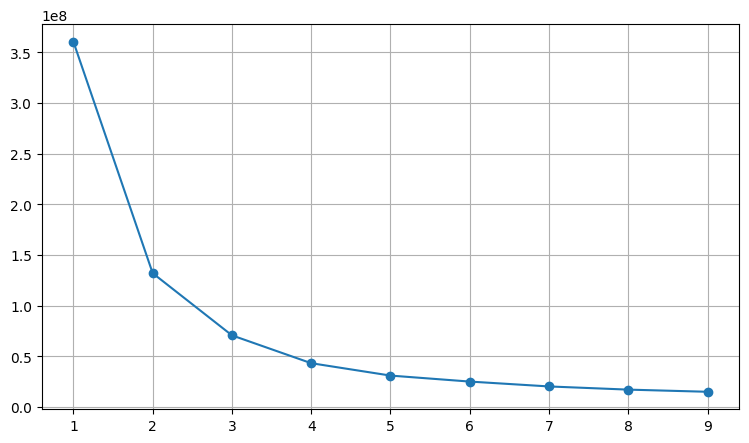

In [109]:
plt.figure(figsize=(9,5))
plt.plot(range(1,10),list,marker='o')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [110]:
kmean = KMeans(n_clusters=4,init='k-means++',random_state=30)
kmean.fit(x)
x['cluster'] = kmean.fit_predict(x)

C:\Users\vedan\AppData\Local\Temp\ipykernel_9792\1538804470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = kmean.fit_predict(x)


In [61]:
x['cluster'].value_counts()

cluster
0    19924
2    15610
1     6406
3     1884
Name: count, dtype: int64

---

## Author : Vedant Ganesh Badukale
Indian institute Of Information Technology